In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import warnings
warnings.filterwarnings('ignore')

#Hokusai level shark graphics.
#import pylab as plt
#import seaborn as sns

#This make the graph possible
#%matplotlib inline

#Functions
from src.funk import Funk 

import time

In [2]:
#This table shows the foreign-born population of every town, by birthcountry.
#It will be the base table because it describes the amount of foreign people by town
#Comunidad de Madrid population is 6.825.005 ; 1.400,438 were born outside Spain ; 539,368 of them have spaniard nationality 

nacidos_fuera = pd.read_excel('raw_data/Nacidos en el extranjero  por Municipio de residencia según País de nacionalidad.xls')

#'Nacidos en el extranjero  por Municipio de residencia según País de nacionalidad.xls'

nacidos_fuera.info(memory_usage='deep')

WARNING *** file size (184735) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Columns: 200 entries, Unnamed: 0 to Unnamed: 199
dtypes: object(200)
memory usage: 1.2 MB


In [3]:
#Cleaning excel table into dataframe

nacidos_fuera.drop([0,1,2,3,4,5,6,7], axis=0, inplace=True) #Excel headers out
naci_fue = nacidos_fuera.rename(columns=nacidos_fuera.iloc[0]) #Assign column headers
naci_fue.columns.values[0] = 'Código municipal'
naci_fue.columns.values[1] = 'Municipio'

naci_fue.head(20)


In [9]:
por_pais = naci_fue.T

por_pais.head(15)

,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190
Código municipal,NaN,NaN,0014,0029,0035,0040,0053,0066,0072,0088,0091,0105,0112,0127,0133,0148,0151,0164,0170,0186,0199,0203,0210,0225,0231,0246,0259,0262,0278,0284,0297,0301,0318,0323,0339,0344,0357,0360,0376,0382,0395,0409,0416,0421,0437,0442,0455,0468,0474,0480,0493,0506,0513,0528,0534,0549,0552,0565,0571,0587,0590,0604,0611,0626,0632,0647,0650,0663,0679,0685,0698,0702,0719,0724,0730,0745,0758,0761,0783,0796,0800,0822,0838,0843,0856,0869,0875,0881,0894,0908,0915,0920,0936,0941,0954,0967,0973,0992,1006,1013,1028,1049,1065,1071,1087,1090,1104,1111,1126,1132,1147,1150,1163,1179,1185,1198,1202,1219,1224,1230,1245,1258,1261,1277,1283,1296,1300,1317,1322,1338,1343,1356,1369,1375,1381,1408,1415,1436,1441,1454,1467,1473,1489,1492,1505,1512,1527,1533,1548,1551,1564,1570,1586,1599,1603,1610,1625,1631,1646,1659,1662,1678,1684,1697,1701,1718,1723,1739,1744,1757,1760,1776,1782,1795,1809,1816,1821,1837,9015,9020,9036,NaN,NaN
Municipio,NaN,Total Municipio de residencia,Acebeda (La),Ajalvir,Alameda del Valle,Alamo (El),Alcalá de Henares,Alcobendas,Alcorcón,Aldea del Fresno,Algete,Alpedrete,Ambite,Anchuelo,Aranjuez,Arganda del Rey,Arroyomolinos,Atazar (El),Batres,Becerril de la Sierra,Belmonte de Tajo,Berzosa del Lozoya,Berrueco (El),Boadilla del Monte,Boalo (El),Braojos,Brea de Tajo,Brunete,Buitrago del Lozoya,Bustarviejo,Cabanillas de la Sierra,Cabrera (La),Cadalso de los Vidrios,Camarma de Esteruelas,Campo Real,Canencia,Carabaña,Casarrubuelos,Cenicientos,Cercedilla,Cervera de Buitrago,Ciempozuelos,Cobeña,Colmenar del Arroyo,Colmenar de Oreja,Colmenarejo,Colmenar Viejo,Collado Mediano,Collado Villalba,Corpa,Coslada,Cubas de la Sagra,Chapinería,Chinchón,Daganzo de Arriba,Escorial (El),Estremera,Fresnedillas de la Oliva,Fresno de Torote,Fuenlabrada,Fuente el Saz de Jarama,Fuentidueña de Tajo,Galapagar,Garganta de los Montes,Gargantilla del Lozoya y Pinilla de Buitrago,Gascones,Getafe,Griñón,Guadalix de la Sierra,Guadarrama,Hiruela (La),Horcajo de la Sierra-Aoslos,Horcajuelo de la Sierra,Hoyo de Manzanares,Humanes de Madrid,Leganés,Loeches,Lozoya,Madarcos,Madrid,Majadahonda,Manzanares el Real,Meco,Mejorada del Campo,Miraflores de la Sierra,Molar (El),Molinos (Los),Montejo de la Sierra,Moraleja de Enmedio,Moralzarzal,Morata de Tajuña,Móstoles,Navacerrada,Navalafuente,Navalagamella,Navalcarnero,Navarredonda y San Mamés,Navas del Rey,Nuevo Baztán,Olmeda de las Fuentes,Orusco de Tajuña,Paracuellos de Jarama,Parla,Patones,Pedrezuela,Pelayos de la Presa,Perales de Tajuña,Pezuela de las Torres,Pinilla del Valle,Pinto,Piñuécar-Gandullas,Pozuelo de Alarcón,Pozuelo del Rey,Prádena del Rincón,Puebla de la Sierra,Quijorna,Rascafría,Redueña,Ribatejada,Rivas-Vaciamadrid,Robledillo de la Jara,Robledo de Chavela,Robregordo,Rozas de Madrid (Las),Rozas de Puerto Real,San Agustín del Guadalix,San Fernando de Henares,San Lorenzo de El Escorial,San Martín de la Vega,San Martín de Valdeiglesias,San Sebastián de los Reyes,Santa María de la Alameda,Santorcaz,Santos de la Humosa (Los),Serna del Monte (La),Serranillos del Valle,Sevilla la Nueva,Somosierra,Soto del Real,Talamanca de Jarama,Tielmes,Titulcia,Torrejón de Ardoz,Torrejón de la Calzada,Torrejón de Velasco,Torrelaguna,Torrelodones,Torremocha de Jarama,Torres de la Alameda,Valdaracete,Valdeavero,Valdelaguna,Valdemanco,Valdemaqueda,Valdemorillo,Valdemoro,Valdeolmos-Alalpardo,Valdepié

In [7]:
where = por_pais[por_pais.8.isna().any(axis=1)]
#tibu.drop(butwhere.index, axis=0, inplace=True)

where

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [ ]:
#naci_fue.drop([8,9], axis=0, inplace=True) #Countries row out
#naci_fue.reset_index(drop=True, inplace=True) #Reset index

#naci_fue.fillna(0, inplace=True) #Nan to 0

In [9]:
naci_fue.head(10)

,Código municipal,Municipio,Total País de nacionalidad,Albania,Austria,Belgica,Bulgaria,Chipre,Dinamarca,España,Finlandia,Francia,Grecia,Hungría,Irlanda,Islandia,Italia,Liechtenstein,Luxemburgo,Malta,Mónaco,Noruega,Países Bajos,Polonia,Portugal,Andorra,Reino Unido,Alemania,Rumanía,San Marino,Santa Sede,Suecia,Suiza,Ucrania,Letonia,Moldavia,Belarús,Georgia,Estonia,Lituania,República Checa,Eslovaquia,Bosnia y Herzegovina,Croacia,Eslovenia,Armenia,Rusia,Macedonia,Serbia,Montenegro,Otros países de Europa,Burkina Faso,Angola,Argelia,Benin,Botswana,Burundi,Cabo Verde,Camerún,Comoras,Congo,Costa de Marfil,Djibouti,Egipto,Etiopía,Gabón,Gambia,Ghana,Guinea,Guinea Bissau,Guinea Ecuatorial,Kenia,Lesotho,Liberia,Libia,Madagascar,Malawi,Mali,Marruecos,Mauricio,Mauritania,Mozambique,Namibia,Níger,Nigeria,República Centroafricana,Sudáfrica,Rwanda,Santo Tomé y Príncipe,Senegal,Seychelles,Sierra Leona,Somalia,Sudán,Swazilandia,Tanzania,Chad,Togo,Túnez,Uganda,República Democrática del Congo,Zambia,Zimbabwe,Eritrea,Sudán del Sur,Otros países de África,Canadá,Estados Unidos de América,México,Antigua y Barbuda,Bahamas,Barbados,Belice,Costa Rica,Cuba,Dominica,El Salvador,Granada,Guatemala,Haití,Honduras,Jamaica,Nicaragua,Panamá,San Vicente y Las Granadinas,República Dominicana,Trinidad Y Tobago,Santa Lucía,San Cristobal y Nieves,Argentina,Bolivia,Brasil,Colombia,Chile,Ecuador,Guyana,Paraguay,Perú,Surinám,Uruguay,Venezuela,Otros países de América,Afganistán,Arabia Saudita,Bahrein,Bangladesh,Myanmar,China,Emiratos Árabes Unidos,Filipinas,India,Indonesia,Iraq,Irán,Israel,Japón,Jordania,Camboya,Kuwait,Laos,Líbano,Malasia,Maldivas,Mongolia,Nepal,Omán,Pakistán,Qatar,Corea del Sur,Corea del Norte,Singapur,Siria,Sri Lanka,Tailandia,Turquía,Vietnam,Brunei,Islas Marshall,Yemen,Azerbaiyán,Kazajstán,Kirguistán,Tayikistán,Turkmenistán,Uzbekistán,Bhutan,Otros países de Asia,Australia,Fiji,Nueva Zelanda,Papua Nueva Guinea,Islas Salomón,Samoa,Tonga,Vanuatu,Micronesia,Tuvalu,Timor Oriental,Apátridas,Otros países de Oceanía
0,0014,Acebeda (La),2,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0029,Ajalvir,843,NaN,NaN,NaN,5,NaN,2,263,NaN,4,NaN,NaN,1,NaN,24,NaN,NaN,NaN,NaN,NaN,4,6,5,NaN,15,10,188,NaN,NaN,4,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,2,NaN,NaN,NaN,NaN,NaN,NaN,58,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,21,5,NaN,NaN,NaN,NaN,NaN,49,1,7,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,7,NaN,NaN,NaN,7,5,13,24,6,7,NaN,3,14,NaN,1,40,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,3,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0035,Alameda del Valle,35,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

'N nan cols: 200'

Código municipal                1.104972
Municipio                       1.104972
Total País de nacionalidad      1.104972
Albania                        77.348066
Austria                        64.640884
                                 ...    
Micronesia                    100.000000
Tuvalu                        100.000000
Timor Oriental                 99.447514
Apátridas                      89.502762
Otros países de Oceanía        99.447514
Length: 200, dtype: float64

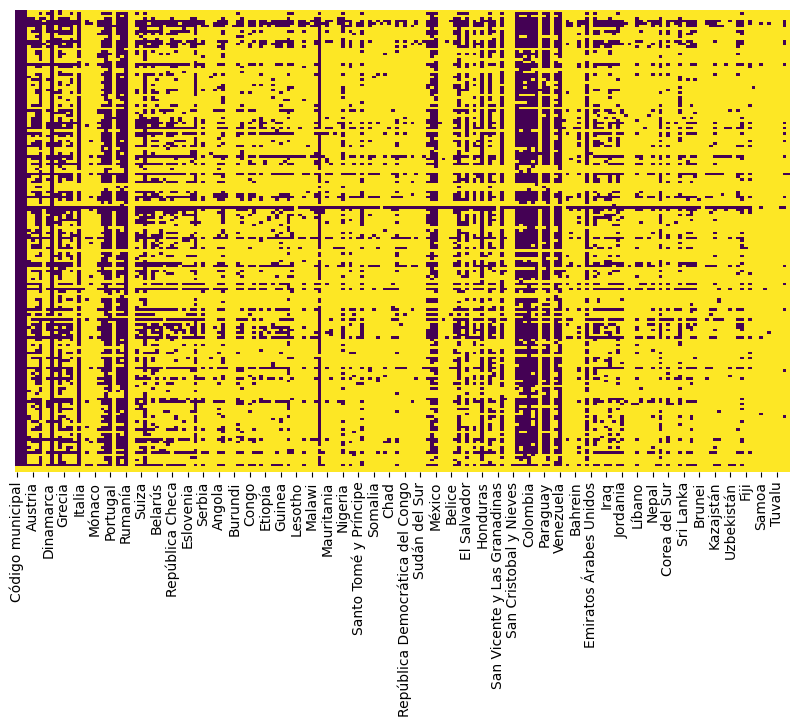

AttributeError: 'NoneType' object has no attribute 'count'

In [11]:
Funk.check_nan(naci_fue)

In [6]:
pue_general = pue_nacimiento[['Unnamed: 1','Unnamed: 2','Unnamed: 3','Unnamed: 4']]

(363, 4)

In [8]:
pue_general.drop(pue_general[(pue_general.pueblos.isna() == 1) & (pue_general.tot_pob.isna() == 1) 
                                           & (pue_general.españoles.isna() == 1)
                                           & (pue_general.extranjeros.isna() == 1)].index, axis=0, inplace=True)
pue_general.shape

(354, 4)

In [9]:
pue_general.extranjeros[(pue_general.extranjeros)]

KeyError: '[1400438, 2, 843, 1903, 37889, 26454, 26560, 587, 3654, 1883, 10396, 13212, 3728, 907, 7940, 1082, 2467, 501, 380, 547, 502, 1057, 1174, 403, 394, 1166, 855, 5476, 1220, 1362, 15908, 10014, 951, 366, 1668, 14959, 671, 1266, 2696, 544, 27724, 1491, 8292, 28642, 1118, 1127, 2635, 1541, 3246, 28495, 1178, 5, 799789, 48881, 6479, 18020, 3844, 5955, 11226, 3357, 26746, 2896, 4561, 4878, 2456, 5586, 6213, 16884, 5333, 2319, 2078, 4167, 1335, 1652, 32990, 4310, 7039, 4362, 7740, 4824, 4715, 24847, 3304, 6528, 3799, 4441, 4006, 2769, 49911, 10964, 8615, 5033, 6004, 9494, 9801, 26981, 4510, 4799, 5569, 4386, 5209, 2508, 37648, 467, 6288, 9424, 3378, 12670, 3312, 1833, 21778, 1995, 5309, 2531, 5947, 1065, 518, 4413, 64095, 4489, 13569, 10609, 18160, 5998, 10415, 84391, 7012, 11660, 13174, 17663, 13325, 10691, 10866, 49879, 3727, 3784, 7403, 9399, 11051, 5744, 8771, 72663, 9278, 20257, 9654, 9100, 7368, 17006, 16932, 1535, 699, 3307, 3059, 4680, 3652, 57188, 14987, 20332, 8170, 5029, 2801, 2022, 1124, 2464, 34233, 1104, 3128, 6369, 10431, 2792, 10409, 51109, 15536, 9246, 4872, 12026, 9429, 23687, 10446, 3616, 9625, 14636, 10248, 2389, 1369, 630, 36063, 8539, 2480, 2927, 5074, 3259, 4758, 7412, 1614, 8247, 2333, 625, 2140, 2280, 869, 13684, 1398, 2252, 3871, 1463, 2660, 715, 465, 1747, 1386, 36097, 507, 737, 5003, 3, 690, 1247, 4945, 36403, 1405, 806, 565, 8020, 13005, 7, 6, 711, 381, 11917, 686, 14562, 2739, 5967, 1488, 4581, 16151, 421, 371, 1426, 1260, 740, 600, 28163, 368, 1216, 947, 3133, 961, 6383, 2407, 12164, 717, 707, 696, 1601, 508, 1527, 456, 1633, 442, 5418, 3116, 914, 3982, 536, 1530, 5574, 18043, 38169, 38515, 59852, 161932, 240330, 835886, 66615, 123367, 227804, 89932, 8036, 11728, 16273, 20630, 7124, 29140] not in index'

In [ ]:
pueblitos = pue_general[pue_general.pueblos.str.contains('Collado Villalba')
                       | pue_general.pueblos.str.contains('Parla')
                       | pue_general.pueblos.str.contains('Torrelodones')
                       | pue_general.pueblos.str.contains('Arroyomolinos')]

pueblitos

In [ ]:
pueblitos['pob_ext'] = (pueblitos['extranjeros'] / pueblitos['tot_pob']) * 100
pueblitos

In [ ]:
url8 = 'https://www.google.com/maps/'

# place/28400+Collado+Villalba,+Madrid/@40.6351648,-4.0238844,14z
# /data=!3m1!4b1!4m6!3m5!1s0xd4173f62e5056e5:0x1d531a9dadd12755!8m2!3d40.6308775!4d-4.0055605!16zL20vMGRicGQ2